In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

In [3]:
def load_data():
    df = pd.read_csv('train.csv')
    submission_df = pd.read_csv('test.csv')
    return df, submission_df

In [4]:
df, submission_df = load_data()

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
submission_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Explanatory Data Analysis

In [7]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


Item Weight_Mean:  12.857645184136183


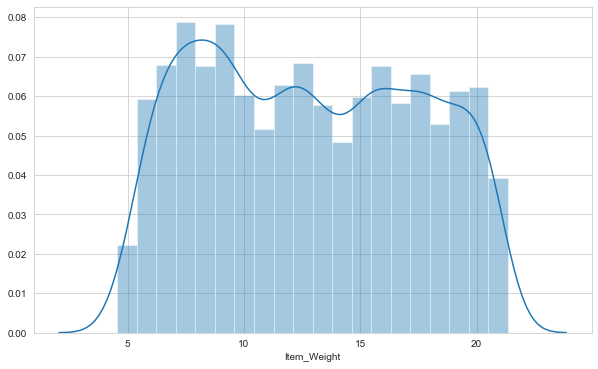

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(df['Item_Weight'])
print('Item Weight_Mean: ', df['Item_Weight'].mean())

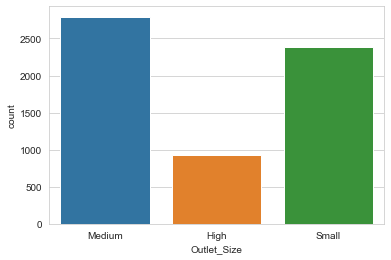

In [12]:
sns.countplot(x='Outlet_Size',data=df)

In [13]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [14]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
def extract_feature(df):
    feat = df.copy()
    cat = ['Item_Fat_Content','Item_Type','Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']
    feat['Item_Weight'] = feat['Item_Weight'].fillna(feat['Item_Weight'].mean())
    feat['Outlet_Size'] = feat['Outlet_Size'].fillna('Medium')
    feat = pd.get_dummies(feat, columns=cat, drop_first=True)
    return feat

In [17]:
df_ = extract_feature(df)
df_.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,443.4228,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,FDN15,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,182.0950,732.3800,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,NCD19,8.93,0.000000,53.8614,994.7052,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [19]:
def train_test(df):
    X = df.drop('Item_Outlet_Sales', axis=1)
    y = df['Item_Outlet_Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

In [20]:
X_train, X_test, y_train, y_test = train_test(df_)

In [21]:
def train_model(X_train, y_train):
    model = LinearRegression()
    X_train = X_train.drop('Item_Identifier', axis=1)
    model.fit(X_train, y_train)
    return model

In [22]:
model = train_model(X_train, y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
def eval_acc(y_test, prediction):
    return print('RMSE: ',np.sqrt(mean_squared_error(y_test, prediction)))

In [24]:
prediction = model.predict(X_test.drop('Item_Identifier', axis=1))

In [25]:
eval_acc(prediction)

RMSE:  1100.2797073181189


In [26]:
df['Item_Outlet_Sales'].std()

1706.499615733832

In [ ]:
def plot(y_test, prediction):
    plt.figure(figsize=(12,8))
    plt.scatter(y_test, prediction, s=10)
    plt.plot(range(0,8000),range(0,8000), 
         color='red',
         linestyle='dashed')
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    return plt.show()

In [123]:
def pipeline_test():
    df, submission_df = load_data()
    df_ = extract_feature(df)
    X_train, X_test, y_train, y_test = train_test(df_)
    model = train_model(X_train, y_train)
    prediction = abs(model.predict(X_test.drop('Item_Identifier', axis=1)))
    acc = eval_acc(y_test, prediction)
    chart = plot(y_test, prediction)
    return acc, chart

RMSE:  1118.6668459328187


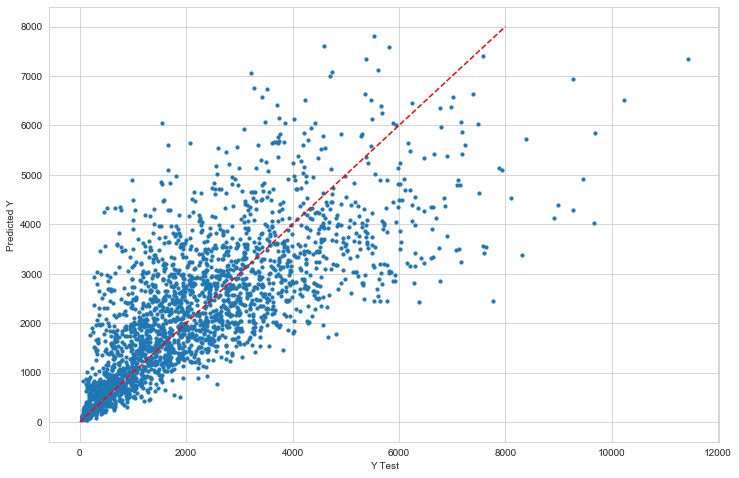

(None, None)

In [125]:
pipeline_test()

In [128]:
def train_model(X_train, y_train):
    model = RandomForestRegressor(random_state=42)
    X_train = X_train.drop('Item_Identifier', axis=1)
    model.fit(X_train, y_train)
    return model

RMSE:  1120.4056844977022


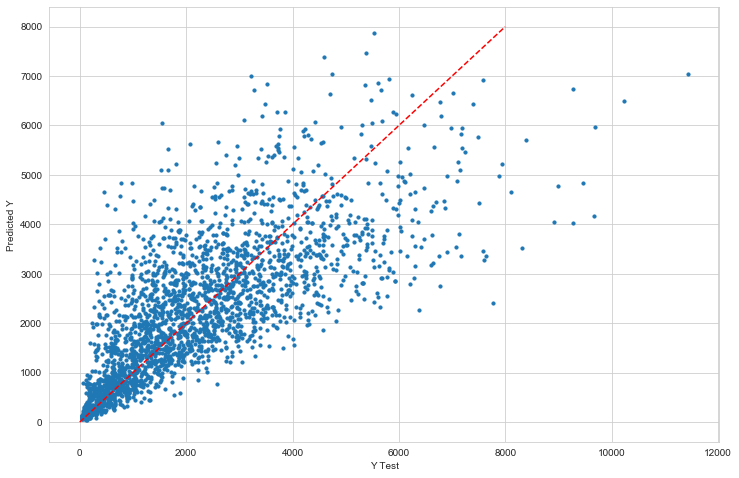

(None, None)

In [129]:
pipeline_test()

In [142]:
def train_model(X_train, y_train):
    X_train = X_train.drop('Item_Identifier', axis=1)
    gsc = GridSearchCV(estimator = RandomForestRegressor(),
                      param_grid = {'max_depth':range(3,7),
                                   'n_estimators':(10,50,100,1000)},
                                   cv = 5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_result = gsc.fit(X_train, y_train)
    best_params = grid_result.best_params_
    model = RandomForestRegressor(max_depth=best_params["max_depth"], 
                                  n_estimators=best_params["n_estimators"], 
                                  random_state=False, verbose=False)  
    model.fit(X_train, y_train)
    return model

RMSE:  1053.147049166997


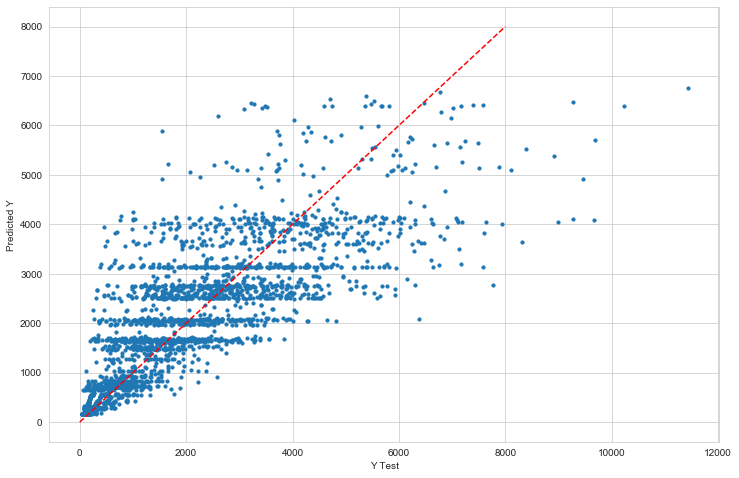

(None, None)

In [141]:
pipeline_test()

# For Submission

In [35]:
submission_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [36]:
submission_df_ = extract_feature(submission_df)
submission_df_.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDW58,20.750000,0.007565,107.8622,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,FDW14,8.300000,0.038428,87.3198,0,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
2,NCN55,14.600000,0.099575,241.7538,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,FDQ58,7.315000,0.015388,155.0340,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
4,FDY38,12.695633,0.118599,234.2300,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [77]:
def submission_pipeline():
    df, submission_df = load_data()
    df_ = extract_feature(df)
    submission_df_ = extract_feature(submission_df)
    X_train, X_test, y_train, y_test = train_test(df_)
    X = pd.concat([X_train, X_test])
    y = pd.concat([y_train, y_test])
    model = train_model(X, y)
    prediction = model.predict(submission_df_.drop('Item_Identifier', axis=1))
    
    submission = pd.DataFrame()
    submission['Item_Identifier'] = submission_df['Item_Identifier']
    submission['Outlet_Identifier'] = submission_df['Outlet_Identifier']
    submission['Item_Outlet_Sales'] = prediction
    submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: 0 if x<0 else x)
    return submission

In [81]:
submission = submission_pipeline()
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1837.126305
1,FDW14,OUT017,1429.833913
2,NCN55,OUT010,1883.760849
3,FDQ58,OUT017,2582.585868
4,FDY38,OUT027,5138.856739
...,...,...,...
5676,FDB58,OUT046,2308.244149
5677,FDD47,OUT018,2463.213448
5678,NCO17,OUT045,1824.749487
5679,FDJ26,OUT017,3590.933270


In [83]:
submission.to_csv('submission.csv', index=False)

In [143]:
def submission_pipeline():
    df, submission_df = load_data()
    df_ = extract_feature(df)
    submission_df_ = extract_feature(submission_df)
    X_train, X_test, y_train, y_test = train_test(df_)
    X = pd.concat([X_train, X_test])
    y = pd.concat([y_train, y_test])
    model = train_model(X, y)
    prediction = model.predict(submission_df_.drop('Item_Identifier', axis=1))
    
    submission = pd.DataFrame()
    submission['Item_Identifier'] = submission_df['Item_Identifier']
    submission['Outlet_Identifier'] = submission_df['Outlet_Identifier']
    submission['Item_Outlet_Sales'] = prediction
    submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: 0 if x<0 else x)
    return submission

In [145]:
submission = submission_pipeline()

In [146]:
submission.to_csv('submission.csv', index=False)